<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/AIML_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset.csv to Titanic-Dataset (7).csv

Your File uploaded successfully: Titanic-Dataset (7).csv

----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----- NULL VALUES -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Se

/tmp/ipython-input-1376903156.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-1376903156.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

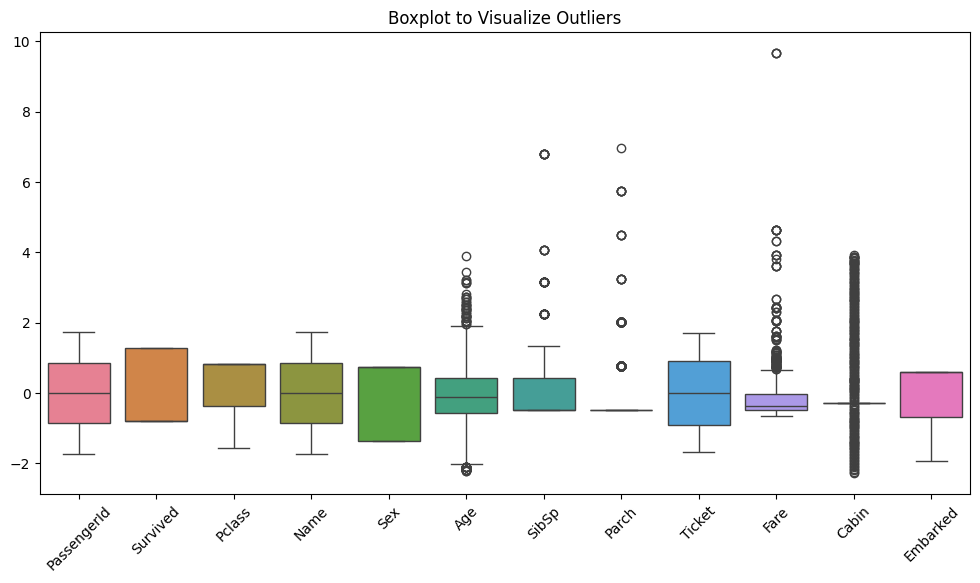


Shape before removing outliers: (891, 12)
Shape after removing outliers: (491, 12)

Cleaned and encoded dataset saved as 'Titanic_Cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"\nYour File uploaded successfully: {file_name}")
data = pd.read_csv(file_name)

# 1: Explore basic info
print("\n----- BASIC INFO -----")
print(data.info())
print("\n----- NULL VALUES -----")
print(data.isnull().sum())
print("\n----- DATA TYPES -----")
print(data.dtypes)
print("\n----- STATISTICAL SUMMARY -----")
print(data.describe())

# 2: Handle missing values (mean/median/imputation)
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        # Use median for numerical columns
        data[col].fillna(data[col].median(), inplace=True)
    else:
        # Use mode for categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(data.isnull().sum())

# 3: Convert categorical features into numerical (Encoding)
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", list(categorical_cols))
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("\nAfter Encoding:")
print(data.head())

# 4: Normalize / Standardize numerical features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("\nAfter Normalization:")
print(data.head())

# 5: Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.title("Boxplot to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()

# 5: Remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_cleaned = remove_outliers(data, numeric_cols)

print(f"\nShape before removing outliers: {data.shape}")
print(f"Shape after removing outliers: {data_cleaned.shape}")

# This is used to save the cleaned and encoded dataset
data_cleaned.to_csv("Titanic_Cleaned.csv", index=False)
print("\nCleaned and encoded dataset saved as 'Titanic_Cleaned.csv'")

# For the Download of the cleaned file
files.download("Titanic_Cleaned.csv")